In [61]:
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as py
import scipy.stats as stats


dataset = pd.read_csv(r'/Users/kirpachahal/Documents/Currency&Price.csv')

In [62]:
dataset.head(64)

,Country,GDP,Price USD,Price USD ($),Basic,Currency,# of TV Shows,# of Movies,Total Library Size,Price per Title
0,Pakistan,Low,Low,2.44,450.00,PKR,2181.0,3642.0,5823.0,0.00042
1,Turkey,Medium,Low,2.58,37.99,TRY,1774.0,2902.0,4676.0,0.00055
2,India,High,Low,2.62,199.00,INR,2193.0,3724.0,5917.0,0.00044
3,Argentina,Medium,Low,3.38,379.00,ARS,1900.0,3149.0,5049.0,0.00067
4,Colombia,Low,Low,4.48,16900.00,COP,1895.0,3149.0,5044.0,0.00089
...,...,...,...,...,...,...,...,...,...,...
59,Slovakia,Low,High,8.69,7.99,EUR,2024.0,5412.0,7436.0,0.00117
60,Bulgaria,Low,High,8.69,7.99,EUR,2024.0,5138.0,7162.0,0.00121
61,Monaco,Low,High,8.69,7.99,EUR,2047.0,3826.0,5873.0,0.00148
62,Gibraltar,Low,High,8.69,7.99,EUR,2125.0,4031.0,6156.0,0.00141


In [63]:
dataset.rename(columns={'# of Movies': 'Num_Movies',
                   'Price USD': 'Price_USD'},
          inplace=True, errors='raise')

In [64]:
dataset.columns


Index(['Country', 'GDP', 'Price_USD', 'Price USD ($)', 'Basic', 'Currency',
       '# of TV Shows', 'Num_Movies', 'Total Library Size', 'Price per Title'],
      dtype='object')

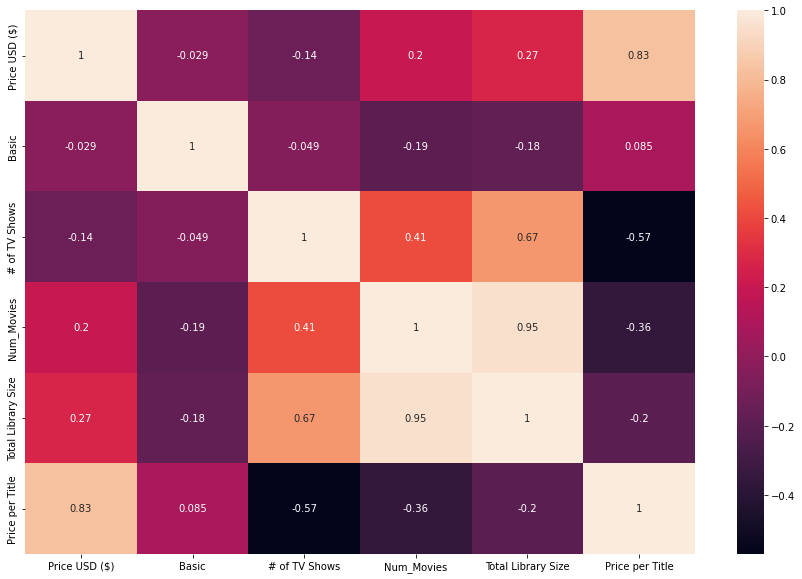

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), annot=True);

In [68]:
dataset['Price_USD'].value_counts()

High      40
Medium    34
Low        7
Name: Price_USD, dtype: int64

In [69]:
dataset['GDP'].value_counts()

Low       54
High      16
Medium    11
Name: GDP, dtype: int64

In [70]:
Price_High = dataset.loc[dataset['Price_USD']=='High', 'Num_Movies']
Price_Medium = dataset.loc[dataset['Price_USD']=='Medium', 'Num_Movies']
Price_Low = dataset.loc[dataset['Price_USD']=='Low', 'Num_Movies']


In [71]:
GDP_High = dataset.loc[dataset['GDP']=='High', 'Num_Movies']
GDP_Medium = dataset.loc[dataset['GDP']=='Medium', 'Num_Movies']
GDP_Low = dataset.loc[dataset['GDP']=='Low', 'Num_Movies']

stats.levene(GDP_High, GDP_Medium, GDP_Low, center='mean')

#Levene’s test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
#you would not conclude that there is sufficient evidence that the two samples have different variances

LeveneResult(statistic=2.1618875146854486, pvalue=0.12195614707857697)

In [72]:
from scipy.stats import normaltest
normaltest(Price_High)

NormaltestResult(statistic=0.4593214736877262, pvalue=0.7948032042113533)

In [73]:
from scipy.stats import f_oneway

f_oneway(GDP_High,GDP_Medium,GDP_Low)

F_onewayResult(statistic=0.9601662811723521, pvalue=0.38730712948094626)

In [89]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


#perform two-way ANOVA
#model = ols('Num_Movies ~ C(GDP) + C(Price_USD) + C(GDP):C(Price_USD)', data=dataset).fit()
#sm.stats.anova_lm(model, typ=2)

# ANOVA
formula = 'Num_Movies~C(GDP)+C(Price_USD)+C(GDP):C(Price_USD)'
model = ols(formula, dataset).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

                           sum_sq    df          F    PR(>F)
C(GDP)               1.109421e+06   2.0   1.817822  0.169752
C(Price_USD)         7.145377e+06   2.0  11.707934  0.000040
C(GDP):C(Price_USD)  1.085914e+06   4.0   0.889653  0.474665
Residual             2.197088e+07  72.0        NaN       NaN


In [90]:
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov


eta_squared(aov_table)
omega_squared(aov_table)

print(aov_table.round(4))

                           sum_sq    df        F  PR(>F)  eta_sq  omega_sq
C(GDP)               1.109421e+06   2.0   1.8178  0.1698  0.0354    0.0158
C(Price_USD)         7.145377e+06   2.0  11.7079  0.0000  0.2282    0.2067
C(GDP):C(Price_USD)  1.085914e+06   4.0   0.8897  0.4747  0.0347   -0.0043
Residual             2.197088e+07  72.0      NaN     NaN     NaN       NaN


In [91]:
#In data above we see that the P-Values for GDP and Price USD.
#The p-value for the interaction effect (0.4747) is greater than 0.05 which depicts that there is no significant interaction effect between GDP frequency and Price USD frequency

#Getting Effect Sizes
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov


eta_squared(aov_table)
omega_squared(aov_table)

print(aov_table.round(4))

                           sum_sq    df        F  PR(>F)  eta_sq  omega_sq
C(GDP)               1.109421e+06   2.0   1.8178  0.1698  0.0354    0.0158
C(Price_USD)         7.145377e+06   2.0  11.7079  0.0000  0.2282    0.2067
C(GDP):C(Price_USD)  1.085914e+06   4.0   0.8897  0.4747  0.0347   -0.0043
Residual             2.197088e+07  72.0      NaN     NaN     NaN       NaN


/Users/kirpachahal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


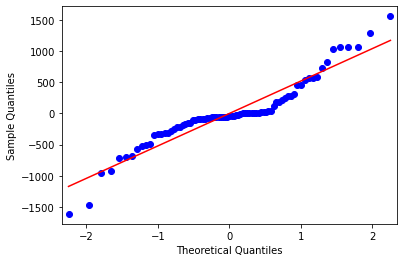

In [92]:
#Plotting Residuals
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()
#In statistical models, a residual is the difference between the observed value and the mean value that the model predicts for that observation. Residual values are especially useful in regression and ANOVA procedures because they indicate the extent to which a model accounts for the variation in the observed data.
#we can see that residuals are almost normally distributed (although points at the extreme ends can be discounted). Hence, we can conclude that it satisfies the Normality assumption of the ANOVA test.

In [98]:
sns.boxplot(x='GDP', y='Num_Movies',
                 data=aov_table,
                 palette="colorblind")

ValueError: Could not interpret input 'GDP'

In [ ]:
d = pd.read_csv(r'/Users/kirpachahal/Documents/Currency&Price.csv', sep="\t")
d_melt = pd.melt(d, id_vars=['GDP'], value_vars=['Low', 'High', 'Medium'])
d_melt.columns = ['GDP', 'Price_USD', 'Num_Movies']
d_melt.head()


#sns.boxplot(x="GDP", y="Num_Movies", hue="Price_USD", data=d_melt, palette="Set3") sns.boxplot(x='age_Group', y='Count',
                 data=AnovaData,
                 palette="colorblind")